In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

In [2]:
teams_df = pd.read_csv(".\Resources\Teams.csv")
playoffs_df = pd.read_csv(".\Resources\PlayoffTeams.csv")
salaries_df = pd.read_csv(".\Resources\Salaries.csv")
franchises_df = pd.read_csv(".\Resources\TeamsFranchises.csv")
master_df = pd.read_csv(".\Resources\Master.csv")
master_df.head()

playerID  birthYear  birthMonth  birthDay birthCountry birthState  \
0  aardsda01     1981.0        12.0      27.0          USA         CO   
1  aaronha01     1934.0         2.0       5.0          USA         AL   
2  aaronto01     1939.0         8.0       5.0          USA         AL   
3   aasedo01     1954.0         9.0       8.0          USA         CA   
4   abadan01     1972.0         8.0      25.0          USA         FL   

    birthCity  deathYear  deathMonth  deathDay  ... nameLast       nameGiven  \
0      Denver        NaN         NaN       NaN  ...  Aardsma     David Allan   
1      Mobile        NaN         NaN       NaN  ...    Aaron     Henry Louis   
2      Mobile     1984.0         8.0      16.0  ...    Aaron      Tommie Lee   
3      Orange        NaN         NaN       NaN  ...     Aase  Donald William   
4  Palm Beach        NaN         NaN       NaN  ...     Abad   Fausto Andres   

  weight height bats throws       debut   finalGame   retroID    bbrefID  
0  220.0   75.0    R      R  2004-04-06  2015-08-23  aardd001  aardsda01  
1  180.0   72.0    R      R  1954-04-13  1976-10-03  aaroh101  aaronha01  
2  190.0   75.0    R      R  1962-04-10  1971-09-26  aarot101  aaronto01  
3  190.0   75.0    R      R  1977-07-26  1990-10-03  aased001   aasedo01  
4  184.0   73.0    L      L  2001-09-10  2006-04-13  abada001   abadan01  

[5 rows x 24 columns]

In [3]:
# clean up Teams dataframes to chosen years (2013-2015)
teams_df = teams_df.loc[teams_df['yearID'] > 2012]
playoffs_df = playoffs_df.loc[playoffs_df['yearID'] > 2012]
salaries_df = salaries_df.loc[salaries_df['yearID'] > 2012]

In [4]:
winners_df = playoffs_df[['teamIDwinner']].drop_duplicates()
losers_df = playoffs_df[['teamIDloser']].drop_duplicates()

In [5]:
playoff_count_df = playoffs_df['teamIDwinner'].append(playoffs_df['teamIDloser'])
playoff_count_df = playoff_count_df.value_counts()
playoff_count_df

KCA    7
SLN    6
LAN    4
PIT    4
SFN    4
CHN    3
BOS    3
NYN    3
DET    3
HOU    2
OAK    2
TBA    2
TOR    2
BAL    2
CLE    1
CIN    1
NYA    1
LAA    1
TEX    1
WAS    1
ATL    1
dtype: int64

In [6]:
playoff_count_df = playoffs_df['teamIDwinner'].append(playoffs_df['teamIDloser'])
playoff_count_df = playoff_count_df.value_counts()

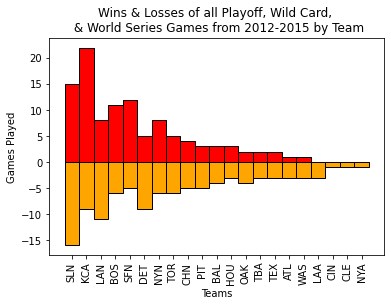

W-Win  W-Loss  L-Win  L-Loss  Total Wins  Total Losses  Total Games
Teams                                                                     
SLN     10.0     5.0    5.0    11.0        15.0          16.0         31.0
KCA     19.0     5.0    3.0     4.0        22.0           9.0         31.0
LAN      3.0     1.0    5.0    10.0         8.0          11.0         19.0
BOS     11.0     6.0    0.0     0.0        11.0           6.0         17.0
SFN     12.0     5.0    0.0     0.0        12.0           5.0         17.0
DET      3.0     2.0    2.0     7.0         5.0           9.0         14.0
NYN      7.0     2.0    1.0     4.0         8.0           6.0         14.0
TOR      3.0     2.0    2.0     4.0         5.0           6.0         11.0
CHN      4.0     1.0    0.0     4.0         4.0           5.0          9.0
PIT      1.0     0.0    2.0     5.0         3.0           5.0          8.0
BAL      3.0     0.0    0.0     4.0         3.0           4.0          7.0
HOU      1.0     0.0    2.0     3.0         3.0           3.0          6.0
OAK      0.0     0.0    2.0     4.0         2.0           4.0          6.0
TBA      1.0     0.0    1.0     3.0         2.0           3.0          5.0
TEX      0.0     0.0    2.0     3.0         2.0           3.0          5.0
ATL      0.0     0.0    1.0     3.0         1.0           3.0          4.0
WAS      0.0     0.0    1.0     3.0         1.0           3.0          4.0
LAA      0.0     0.0    0.0     3.0         0.0           3.0          3.0
CIN      0.0     0.0    0.0     1.0         0.0           1.0          1.0
CLE      0.0     0.0    0.0     1.0         0.0           1.0          1.0
NYA      0.0     0.0    0.0     1.0         0.0           1.0          1.0

In [7]:
# stacked bar graph for wins and loses per match up AND ratio of wins to total games played per year per team

wins_losses_df = playoffs_df.copy()

# Seperating out data by team for wins and losses

wins = wins_losses_df[["teamIDwinner", "wins",
                       "losses"]].rename(columns={"teamIDwinner":"Teams", "wins": "W-Win", "losses":"W-Loss"})

losses = wins_losses_df[["teamIDloser", "losses",
                         "wins"]].rename(columns={"teamIDloser":"Teams", "losses":"L-Win", "wins":"L-Loss"})

win_data = wins.groupby(["Teams"]).sum()

loss_data = losses.groupby(["Teams"]).sum()

games_df = pd.merge(win_data, loss_data, on="Teams", how="outer")

games_df = games_df.fillna(0)

games_df["Total Wins"] = games_df["W-Win"] + games_df["L-Win"]

games_df["Total Losses"] = games_df["W-Loss"] + games_df["L-Loss"]

games_df["Total Games"] = games_df["Total Wins"] + games_df["Total Losses"]

games_df.sort_values(by=["Total Games"], inplace=True, ascending=False)

# Bar chart

win_bar = games_df["Total Wins"]
loss_bar = games_df["Total Losses"]*(-1)

bars = np.add(win_bar, loss_bar).tolist()

r = np.arange(0,42,2)

names = games_df.index.values
width = 2

plt.bar(r, win_bar, color='red', edgecolor='black', width=width)
plt.bar(r, loss_bar, color='orange', edgecolor='black', width=width)

plt.xticks(r, names, rotation=90)
plt.xlabel("Teams")
plt.ylabel("Games Played")
plt.title("Wins & Losses of all Playoff, Wild Card, \n & World Series Games from 2012-2015 by Team")
plt.show()

# This is just a check. It provides the totals of all games per team. Since every match has a winner and a loser,
# the "Total Games" will be double the number of matches in the playoffs and WS between 2005-2015.
# games_df.sum()

games_df

In [11]:
#Create the teams_bridge table
teams_bridge = pd.read_csv(".\Ballpark Database 2019 Final Files\Teams_bridge.csv")
teams_bridge.head()
teams_bridge =  teams_bridge[["TeamID", "City",
                       "Nickname"]]
teams_bridge.head()

TeamID       City      Nickname
0    ALT    Altoona         Pride
1    ANA    Anaheim        Angels
2    ARI    Arizona  Diamondbacks
3    ATL    Atlanta        Braves
4    BAL  Baltimore       Orioles

In [12]:
games_df.to_csv("Resources/games_df.csv", encoding="uTF8", index=True, header=True)


In [31]:
#Combine attendance files into one

attendance_2013 = pd.read_csv(".\Attendance_2013.csv")
attendance_2014 = pd.read_csv(".\Attendance_2014.csv")
attendance_2015 = pd.read_csv(".\Attendance_2015.csv")

# attendance_2013.head()
# attendance_2014.head()
attendance_2015.head()

# attendance_2013.count()
# attendance_2014.count()
# attendance_2015.count()
# #all counts are 30

TeamID  Attendance  Avg_Attendance
0    ARI     2080145           25681
1    ATL     2001392           24709
2    BAL     2281202           29246
3    BOS     2880694           35564
4    CHC     2919122           36039

In [33]:
merge_df = pd.merge(attendance_2013, attendance_2014, on="TeamID")
merge_df

merge_df = merge_df.rename(columns={"Attendance_x": "Attendance_2013", "Avg_Attendance_x": "Avg_Attendance_2013"})
merge_df = merge_df.rename(columns={"Attendance_y": "Attendance_2014", "Avg_Attendance_y": "Avg_Attendance_2014"})
merge_df.head()

merge_all_df = pd.merge(merge_df, attendance_2015, on="TeamID")
merge_all_df.head()

merge_all_df = merge_all_df.rename(columns={"Attendance": "Attendance_2015", "Avg_Attendance": "Avg_Attendance_2015"})
merge_all_df.head()

TeamID  Attendance_2013  Avg_Attendance_2013  Attendance_2014  \
0    ARI          2134895                26357          2073730   
1    ATL          2548679                31465          2354305   
2    BAL          2357561                29106          2464473   
3    BOS          2833333                34979          2956089   
4    CHC          2642682                32626          2652113   

   Avg_Attendance_2014  Attendance_2015  Avg_Attendance_2015  
0                25602          2080145                25681  
1                29065          2001392                24709  
2                30426          2281202                29246  
3                36495          2880694                35564  
4                32742          2919122                36039

In [37]:
#Clean merged file and export as CSV
merge_all_df.count()
merge_all_df.dropna(how='any')

merge_all_df.to_csv("Resources/Attendance.csv", index=False, header=True)